In [23]:
# RNA EDA
# read compressed csv file from beataml transcriptomics

import pandas as pd
import numpy as np
import gzip
import sys

df = pd.read_csv('/people/moon515/mpnst_smile_model/2024_05_17/broad_sanger_transcriptomics.csv.gz', compression='gzip') # filter study for CCLE and source for Broad
sample = pd.read_csv('/people/moon515/mpnst_smile_model/2024_05_17/broad_sanger_samples.csv')
sample[sample['other_id_source'] == 'CCLE']
# obtain improve_sample_id from ccle
ccle_sample = sample[sample['other_id_source'] == 'CCLE']
ccle_id  = ccle_sample['improve_sample_id'].values
ccle_transcriptomics = df[df['improve_sample_id'].isin(ccle_id)]
# get frequency of unique values in "study" column
ccle_transcriptomics['study'].value_counts() # DepMap has better coverage
ccle_transcriptomics = ccle_transcriptomics[ccle_transcriptomics['study'] == 'DepMap']
beataml_transcriptomics = pd.read_csv('/people/moon515/mpnst_smile_model/2024_05_17/beataml_transcriptomics.csv.gz', compression='gzip')
mpnst_transcriptomics = pd.read_csv('/people/moon515/mpnst_smile_model/2024_05_17/mpnst_transcriptomics.csv.gz', compression='gzip')


In [ ]:
ccle_transcriptomics

In [ ]:
beataml_transcriptomics

In [ ]:
mpnst_transcriptomics

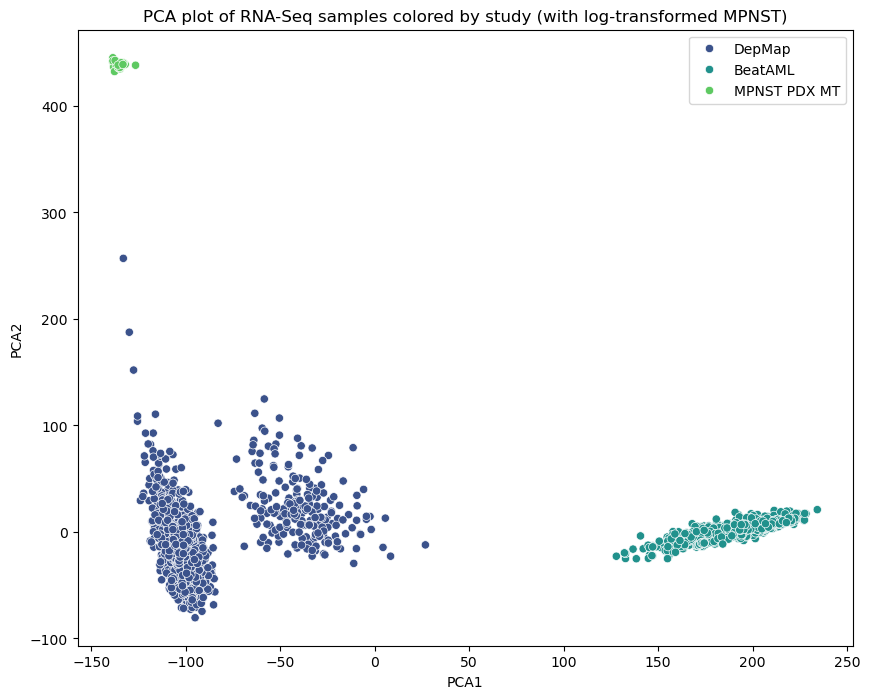

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Load datasets
ccle = ccle_transcriptomics
beataml = beataml_transcriptomics
mpnst = mpnst_transcriptomics

# Function to convert to wide format
def long_to_wide(df, sample_col, feature_col, value_col, source_col):
    # Aggregate duplicate entries by taking the mean
    df_agg = df.groupby([sample_col, feature_col], as_index=False).agg({value_col: 'mean'})
    wide_df = df_agg.pivot(index=sample_col, columns=feature_col, values=value_col)
    sources = df.drop_duplicates(subset=[sample_col])[[sample_col, source_col]].set_index(sample_col)
    return wide_df, sources

# Log-transform the transcriptomics values for MPNST dataset
mpnst['transcriptomics'] = np.log1p(mpnst['transcriptomics'])

# Convert datasets to wide format
ccle_wide, ccle_sources = long_to_wide(ccle, 'improve_sample_id', 'entrez_id', 'transcriptomics', 'study')
beataml_wide, beataml_sources = long_to_wide(beataml, 'improve_sample_id', 'entrez_id', 'transcriptomics', 'study')
mpnst_wide, mpnst_sources = long_to_wide(mpnst, 'improve_sample_id', 'entrez_id', 'transcriptomics', 'study')

# Combine datasets
combined_wide = pd.concat([ccle_wide, beataml_wide, mpnst_wide], axis=0)
combined_sources = pd.concat([ccle_sources, beataml_sources, mpnst_sources], axis=0)

# Fill NaN values with 0
combined_wide = combined_wide.fillna(0)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_wide)

# Create a DataFrame for PCA results and join with study information
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'], index=combined_wide.index)
pca_df = pca_df.join(combined_sources)

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='study', data=pca_df, palette='viridis')
plt.title('PCA plot of RNA-Seq samples colored by study (with log-transformed MPNST)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [3]:
# PROTEOMICS EDA
# read compressed csv file from beataml transcriptomics

import pandas as pd
import numpy as np
import gzip
import sys

df = pd.read_csv('/people/moon515/mpnst_smile_model/2024_05_17/broad_sanger_proteomics.csv.gz', compression='gzip') # filter study for CCLE and source for Broad
sample = pd.read_csv('/people/moon515/mpnst_smile_model/2024_05_17/broad_sanger_samples.csv')
sample[sample['other_id_source'] == 'CCLE']
# obtain improve_sample_id from ccle
ccle_sample = sample[sample['other_id_source'] == 'CCLE']
ccle_id  = ccle_sample['improve_sample_id'].values
ccle_omics = df[df['improve_sample_id'].isin(ccle_id)]
# get frequency of unique values in "study" column
ccle_omics['study'].value_counts() # DepMap has better coverage
ccle_omics = ccle_omics[ccle_omics['study'] == 'DepMap']
beataml_omics = pd.read_csv('/people/moon515/mpnst_smile_model/2024_05_17/beataml_proteomics.csv.gz', compression='gzip')
mpnst_omics = pd.read_csv('/people/moon515/mpnst_smile_model/2024_05_17/mpnst_proteomics.csv.gz', compression='gzip')


In [4]:
ccle_omics

,entrez_id,proteomics,improve_sample_id,study,source
0,6558,2.111348,590,DepMap,Broad
1,23028,0.379683,590,DepMap,Broad
2,6657,-0.246367,590,DepMap,Broad
3,5396,0.322445,590,DepMap,Broad
4,51450,-0.246657,590,DepMap,Broad
...,...,...,...,...,...
3652512,10945,-1.047530,979,DepMap,Broad
3652513,153339,1.011594,979,DepMap,Broad
3652514,241,0.640295,979,DepMap,Broad
3652515,84418,-2.004067,979,DepMap,Broad


In [5]:
beataml_omics

,improve_sample_id,proteomics,entrez_id,source,study
0,2967,-0.1620,2.0,synapse,BeatAML
1,2967,-0.1620,2.0,synapse,BeatAML
2,2967,0.4210,8086.0,synapse,BeatAML
3,2967,0.4210,8086.0,synapse,BeatAML
4,2967,0.2240,65985.0,synapse,BeatAML
...,...,...,...,...,...
10114374,3063,-0.0114,23140.0,synapse,BeatAML
10114375,3063,0.0180,26009.0,synapse,BeatAML
10114376,3063,0.0180,26009.0,synapse,BeatAML
10114377,3063,0.0180,26009.0,synapse,BeatAML


In [6]:
mpnst_omics

,entrez_id,proteomics,improve_sample_id,source,study
0,1,-6.658789,3985,NF Data Portal,MPNST PDX MT
1,1,-6.927023,3985,NF Data Portal,MPNST PDX MT
2,29974,-0.940650,3985,NF Data Portal,MPNST PDX MT
3,29974,-0.704121,3985,NF Data Portal,MPNST PDX MT
4,2,-2.408186,3985,NF Data Portal,MPNST PDX MT
...,...,...,...,...,...
113654,7791,-0.462726,4000,NF Data Portal,MPNST PDX MT
113655,23140,0.559287,4000,NF Data Portal,MPNST PDX MT
113656,23140,0.605220,4000,NF Data Portal,MPNST PDX MT
113657,26009,-0.470590,4000,NF Data Portal,MPNST PDX MT


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Load datasets
ccle = ccle_omics
beataml = beataml_omics
mpnst = mpnst_omics

# Function to convert to wide format
def long_to_wide(df, sample_col, feature_col, value_col, source_col):
    # Aggregate duplicate entries by taking the mean
    df_agg = df.groupby([sample_col, feature_col], as_index=False).agg({value_col: 'mean'})
    wide_df = df_agg.pivot(index=sample_col, columns=feature_col, values=value_col)
    sources = df.drop_duplicates(subset=[sample_col])[[sample_col, source_col]].set_index(sample_col)
    return wide_df, sources

# Convert datasets to wide format
ccle_wide, ccle_sources = long_to_wide(ccle, 'improve_sample_id', 'entrez_id', 'proteomics', 'study')
beataml_wide, beataml_sources = long_to_wide(beataml, 'improve_sample_id', 'entrez_id', 'proteomics', 'study')
mpnst_wide, mpnst_sources = long_to_wide(mpnst, 'improve_sample_id', 'entrez_id', 'proteomics', 'study')

/tmp/ipykernel_9480/2812794128.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_wide['PCA1'] = pca_result[:, 0]
/tmp/ipykernel_9480/2812794128.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_wide['PCA2'] = pca_result[:, 1]


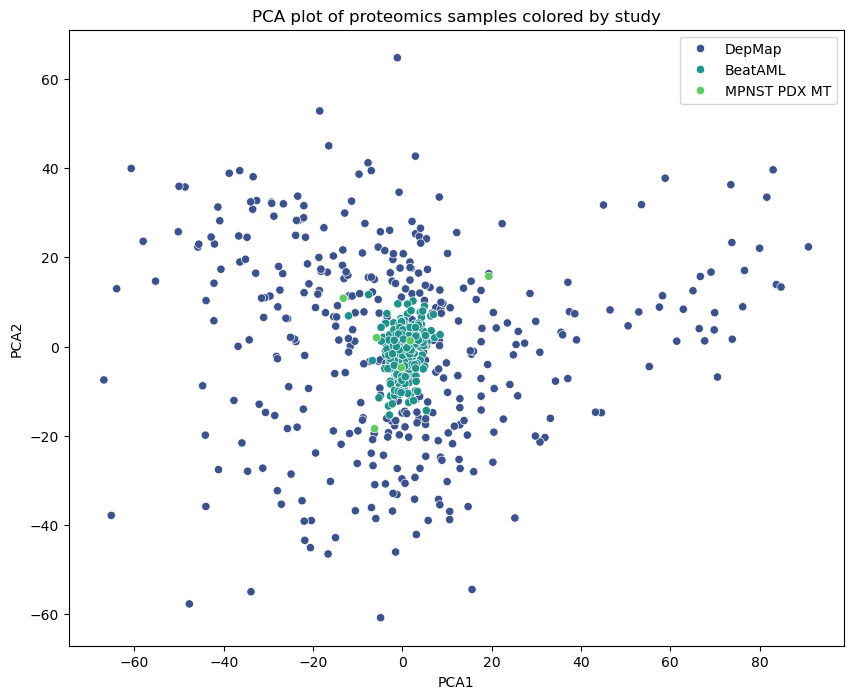

In [22]:
# Combine datasets
combined_wide = pd.concat([ccle_wide, beataml_wide, mpnst_wide], axis=0)
combined_sources = pd.concat([ccle_sources, beataml_sources, mpnst_sources], axis=0)

# Fill NaN values with 0
# combined_wide = combined_wide.fillna(0)

# Fill NaN values with the mean of the column
combined_wide = combined_wide.fillna(combined_wide.mean())

# PCA plot
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_wide)
combined_wide['PCA1'] = pca_result[:, 0]
combined_wide['PCA2'] = pca_result[:, 1]
combined_wide = combined_wide.join(combined_sources)

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='study', data=combined_wide, palette='viridis')
plt.title('PCA plot of proteomics samples colored by study')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [25]:
combined_wide

entrez_id,1.0,2.0,9.0,10.0,12.0,13.0,14.0,15.0,16.0,18.0,...,121725057.0,122394732.0,122455338.0,122455339.0,122455340.0,122455342.0,122513141.0,122526779.0,122526780.0,122539214.0
improve_sample_id,,,,,,,,,,,,,,,,,,,,,
1,0.555816,0.189034,3.649615,0.389567,0.748461,1.981853,6.453188,0.056584,7.460579,2.550901,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,3.762349,0.176323,2.518535,0.918386,0.495695,0.137504,7.048759,0.367371,5.959770,2.604071,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,1.744161,4.491212,2.295723,0.028569,8.772414,0.000000,6.043519,0.124328,6.283551,2.500802,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,0.137504,0.555816,4.203201,0.070389,0.659925,0.641546,7.046360,0.263034,6.842225,0.454176,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
5,4.384050,0.411426,3.060047,0.014355,0.042644,0.042644,6.362821,0.042644,7.074891,2.344828,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,0.000000,0.000000,0.000000,0.275394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.007626,0.751789
4030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.155622,0.449365,0.0,0.023559,3.894512
4031,0.000000,0.000000,0.000000,0.054465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.164233


In [36]:
sample = pd.read_csv('/people/moon515/mpnst_smile_model/2024_05_17/broad_sanger_experiments.tsv', sep='\t')


In [37]:
sample

,source,improve_sample_id,improve_drug_id,study,time,time_unit,dose_response_metric,dose_response_value
0,pharmacoGX,1.0,SMI_12508,gCSI,72,hours,fit_auc,2.6670
1,pharmacoGX,1.0,SMI_13125,gCSI,72,hours,fit_auc,0.3246
2,pharmacoGX,1.0,SMI_13682,gCSI,72,hours,fit_auc,0.8216
3,pharmacoGX,1.0,SMI_16078,gCSI,72,hours,fit_auc,0.7958
4,pharmacoGX,1.0,SMI_25225,gCSI,72,hours,fit_auc,0.9968
...,...,...,...,...,...,...,...,...
43651125,pharmacoGX,1924.0,SMI_5902,GDSCv2,72,hours,dss,0.5526
43651126,pharmacoGX,1924.0,SMI_6479,GDSCv2,72,hours,dss,0.1561
43651127,pharmacoGX,1924.0,SMI_6732,GDSCv2,72,hours,dss,0.4127
43651128,pharmacoGX,1924.0,SMI_8498,GDSCv2,72,hours,dss,0.4176


In [38]:
sample[sample['study'] == 'CCLE']

,source,improve_sample_id,improve_drug_id,study,time,time_unit,dose_response_metric,dose_response_value
9032320,pharmacoGX,1.0,SMI_11936,CCLE,72,hours,fit_auc,0.9833
9032321,pharmacoGX,1.0,SMI_12904,CCLE,72,hours,fit_auc,0.6335
9032322,pharmacoGX,1.0,SMI_23336,CCLE,72,hours,fit_auc,0.7089
9032323,pharmacoGX,1.0,SMI_25570,CCLE,72,hours,fit_auc,0.4910
9032324,pharmacoGX,1.0,SMI_27031,CCLE,72,hours,fit_auc,0.9062
...,...,...,...,...,...,...,...,...
9147975,pharmacoGX,1929.0,SMI_54485,CCLE,72,hours,dss,0.0249
9147976,pharmacoGX,1929.0,SMI_55113,CCLE,72,hours,dss,0.1117
9147977,pharmacoGX,1929.0,SMI_55142,CCLE,72,hours,dss,0.0000
9147978,pharmacoGX,1929.0,SMI_56087,CCLE,72,hours,dss,0.0000


In [43]:
# sample[sample['study'] == 'CCLE']
# obtain improve_sample_id from ccle
ccle_sample = sample[sample['study'] == 'CCLE']
ccle_id  = ccle_sample['improve_sample_id'].values

In [45]:
# get unique id from nunpy array
unique_ccle_id = np.unique(ccle_id)


In [47]:
unique_ccle_id
len(unique_ccle_id)


503

In [60]:
# Extract sample IDs (assuming 'improve_sample_id' is the column of interest)
comparing_id = combined_wide.index.values

# find how many id is matching in comparing_id with unique_ccle_id
matching_id = np.isin(unique_ccle_id,comparing_id)


In [61]:
matching_id

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,

In [62]:
matching_id.sum()

473

In [74]:
sample = pd.read_csv('/people/moon515/mpnst_smile_model/2024_05_08/mpnst_experiments_modified_updated.tsv', sep='\t')
sample['improve_sample_id'].values
# get unique id from nunpy array
unique_mpnst_id = np.unique(sample['improve_sample_id'].values)

# find how many id is matching in comparing_id with unique_ccle_id
matching_id = np.isin(unique_mpnst_id,comparing_id)
matching_id.sum()

8

In [76]:
unique_mpnst_id

array([4015, 4018, 4020, 4021, 4022, 4023, 4024, 4025, 4026, 4027])